In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

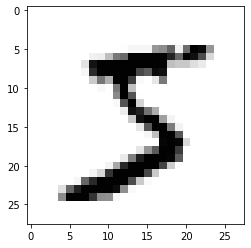

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' %i)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [6]:
# 정규화 과정
X_train = X_train.reshape(X_train.shape[0], 784)
#X_train = X_train.astype('float65')
X_train = X_train / 255.0

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [9]:
Y_class_train[0]

5

In [10]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [11]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

In [13]:
seed=2020
np.random.seed(seed)

In [14]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(350, activation='relu'),
    Dense(250, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 350)               179550    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               87750     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 695,330
Trainable params: 695,330
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [17]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [18]:
modelpath = MODEL_DIR +'mnist{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience =10)

In [19]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3000, batch_size=200, verbose=0, callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.12372, saving model to ./model/mnist01-0.1237.hdf5

Epoch 00002: val_loss improved from 0.12372 to 0.09474, saving model to ./model/mnist02-0.0947.hdf5

Epoch 00003: val_loss improved from 0.09474 to 0.07740, saving model to ./model/mnist03-0.0774.hdf5

Epoch 00004: val_loss did not improve from 0.07740

Epoch 00005: val_loss did not improve from 0.07740

Epoch 00006: val_loss did not improve from 0.07740

Epoch 00007: val_loss improved from 0.07740 to 0.06776, saving model to ./model/mnist07-0.0678.hdf5

Epoch 00008: val_loss did not improve from 0.06776

Epoch 00009: val_loss did not improve from 0.06776

Epoch 00010: val_loss did not improve from 0.06776

Epoch 00011: val_loss did not improve from 0.06776

Epoch 00012: val_loss did not improve from 0.06776

Epoch 00013: val_loss did not improve from 0.06776

Epoch 00014: val_loss did not improve from 0.06776

Epoch 00015: val_loss improved from 0.06776 to 0.06657, saving model to ./model

In [24]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/mnist15-0.0666.hdf5')

In [25]:
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test, Y_test, verbose=2)[1])) 

10000/10000 - 0s - loss: 0.0666 - accuracy: 0.9855

 Test Accuracy: 0.9855


In [26]:

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

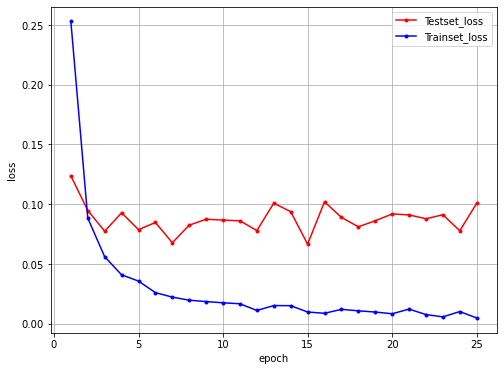

In [27]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize = (8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 결론: Best Model은 Epoch 15, 정확도는 98.55%